# P3: Neural Nemesis!


## Table Of Content

1. Introduction
2. Preliminaries
3. Software setup
5. Grading rubric
6. Submission guidelines

## 1. Introduction
Deep learning models have achieved impressive results, but they can still be vulnerable to adversarial attacks. By placing a small, carefully designed patch on an image, it's possible to trick the model into making incorrect predictions. These attacks can have serious implications, especially in safety-critical systems like autonomous vehicles. In this project, you will investigate this vulnerability by creating an adversarial patch that causes a depth estimation model to produce inaccurate results.

To summarize, you will start with a randomly initialized patch tensor with gradients enabled. Apply augmentation techniques (such as noise and perspective transform) to help the patch generalize to real-world scenarios. Use a pre-trained monocular depth estimation network to estimate disparity and implement an objective function to minimize the difference between the estimated disparity and a target incorrect disparity for the patched area. Compute gradients and perform gradient descent to optimize the patch.

Next, take your optimized patch to the real world. Print it on paper and place it in a parking lot or on your parked car (avoid traffic). Capture a photo with your phone and run inference with the depth/disparity estimation network. Compare the outputs with and without the patch to evaluate its effectiveness.

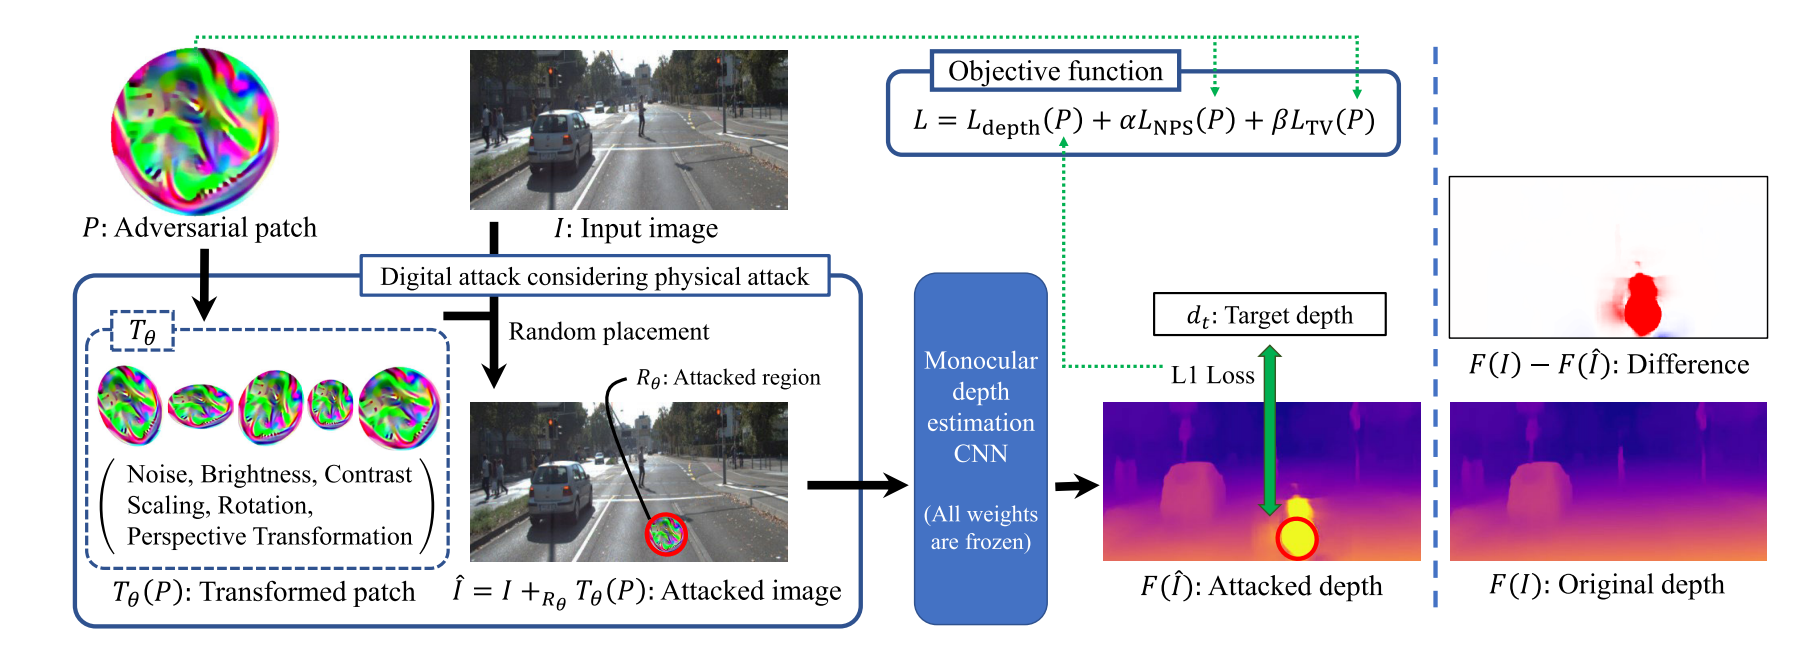

[image credits: Yamanaka, Koichiro et al. “Adversarial Patch Attacks on Monocular Depth Estimation Networks.” IEEE Access 8 (2020): 179094-179104.]

You will be implementing the technique provided in "[Adversarial Patch Attacks on Monocular Depth Estimation Networks](https://arxiv.org/pdf/2010.03072)" paper. Please refer to it for more information.

This project is divided into 3 parts:
- part 1. Patch augmentation
- part 2. Patch training and validation
- part 3. Realworld testing
- part 4. Explain how you would apply Fast Gradient Sign Method (FGSM) for attacking depth networks in your report

**Please review the submission guidelines and grading rubric before starting your work.**


## 2. Preliminaries

### Part 1 - Patch augmentation
For this part, you will augment and apply a random patch to an image. The list of augmentations you need to implement is given below:

1. Perspective transform
1. Scaling and rotation
1. Noise, brightness, contrast, and color jitter

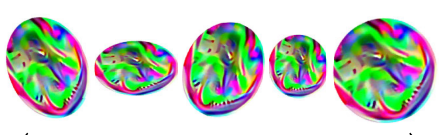

You are free to use any software package for this purpose (torchvision has some helpful functions). Please include a snapshot of the patch augmentation in your report as shown in the above figure.

Next apply the patch on any image and share it in your report. 

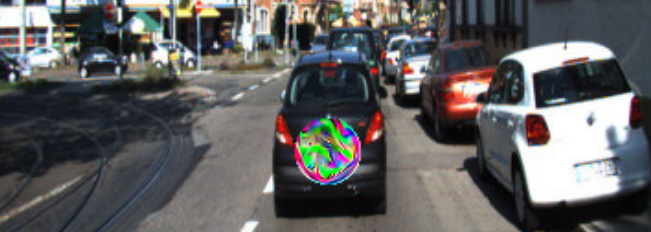

For this purpose, it can be helpful to create a mask (containing 0's and 1's) and apply the patch using the following equation.
$$(1 - M) \cdot \text{image} + M \cdot \text{patch}$$


### Part 2 - Patch training and validation

The training pipeline is provided in `src` folder and you are free to modify the same. 

Train your patch for the following target disparity,

1. 10
2. 70 

You are required to implement the loss function given in the [reference paper](thtps://arxiv.org/pdf/2010.03072) for the patched region in training images.

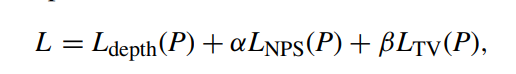

#### Depth loss:

Use an L1 loss to minimize the error between the preset disparity and network output in the patched area. This loss forces the patch to make the network give a preset constant disparity.

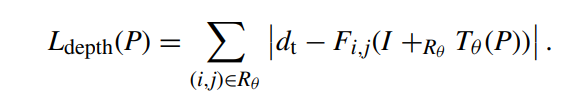

#### Non-Printability Score:
NPS in the loss function is to ensure that the patch's color space remains within the printable color gamut.
This function minimizes the l1 error between the color (r,g ,b) and the closest color from a set of printable colors.

Note - In case you are adding color jitter to your training process, this loss function may not be important! You can take a call on whether to use NPS or not.

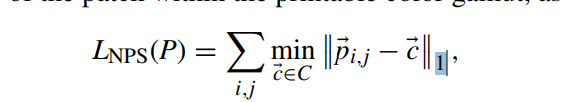

### TOTAL VARIATION (TV)

Non-smooth patches will not be printed accurately on a sheet of paper. Hence smoothness in the patch is encouraged by penalizing sharp changes between successive pixels using the following loss function,

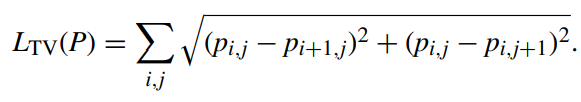

## 3. Software setup

## Installation:

Work inside the src folder. 

Install the source dependencies by,

`chmod +x install.sh && ./install.sh`

Download the dataset using the following command in bash shell,

```
DATASET_PATH=<YOUR DATASET PATH>
mkdir -p $DATASET_PATH
```

Copy the `./src/kitti_raw_dataset_files_small.txt` file to `./repository/Learning-Monocular-Depth-by-Stereo-master/scripts/` location. This script contains a subset of kitti dataset.

```
wget -i ./repository/Learning-Monocular-Depth-by-Stereo-master/scripts/kitti_raw_dataset_files_small.txt -P $DATASET_PATH
cd $DATASET_PATH
unzip '*.zip'
```

This download will be large and slow. You can free up disk space by deleting the zip files later if needed.

## Training:

`python train.py --data_root <YOUR DATASET PATH> --train_list ./Src/list/small_train_list2.txt`

## Validation:

Attack the images given in .src/Src/input_img/ folders and share your results (images in your report) like done in the paper.

Show the rgb, disparity, changes in disparity between the unattacked and attacked image clearly like shown below,

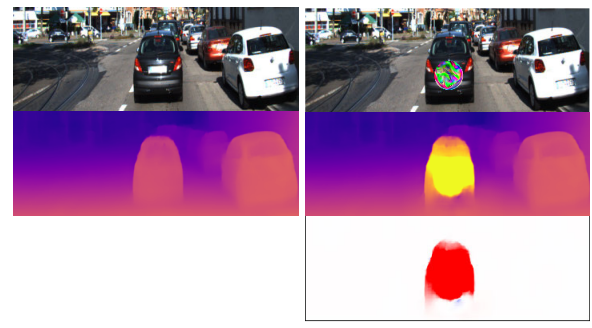

Report the outputs for the mentioned target distances.

##  Realworld testing:

Print the patch in color on a Letter/A4 sheet and cut the patch area. Place the patch on a road scene (the road in front of Unity Hall recommended) and record a video by moving around the patch (such that the patch is visible in every frame). Please be careful when recording the video and do not break any road rules! Perform inference frame by frame of your recorded video and create a video from the inferref RGB + disparity as plasma side-by-side. Show the video of inference before and after placing the patch, save these as `video1.mp4` and `video2.mp4`.

Report the outputs for the mentioned target distances.

## 4. Grading rubric

- Part 1: 30
- Part 2: 40
- Part 3: 20
- Part 4: 10

- For RBE474X: Part1 + Part2 + part3 = 100% of the grade (100/100).
- For RBE595-A01-SP: You are expected to implement Part1-Part4 for getting full credits (110/110).

## 5. Submission guidelines

### 5.1 Report

Please include the following in your report,

1. Images, disparity before and after attacking for part 2. Also show the difference in the disparity before and after attacking.
2. Images, disparity before and after attacking for part 3. Also show the difference in the disparity before and after attacking.
3. Sample images after augmenting the patches.
4. The trained patches must be provided in your report.

Please follow any other reporting instructions given in this document. Describe your observations and explain why your algorithm/technique works or does not work.

### 5.4 Folder structure
Your submission on ELMS/Canvas must be a ``zip`` file, following the naming convention ``GroupGROUPNUM_p3.zip``. If your group number is ``4``, then the submission file should be named ``Group4_p3.zip``. The `GROUPNUM` can be found on Canvas. The file **must have the following directory structure**. Do not change the files to run the code. You can have any helper functions in sub-folders as you wish, be sure to index them using relative paths and if you have command line arguments for your codes, make sure to have default values too. Please provide detailed instructions on how to run your code in ``README.md`` file. 

<p style="background-color:#ddd; padding:5px">
<b>NOTE:</b> 
Furthermore, the size of your submission file should <b>NOT</b> exceed more than <b>100MB</b>.
</p>

The file tree of your submission <b>SHOULD</b> resemble this:

```
GroupGROUPNUM_p3.zip
├── src
|   └── code files (do not submit data/checkpoint patches/network model)
├── Report.pdf 
├── main_notebook.ipynb
├── patch_10.png
├── patch_70.png
├── video1.mp4
├── video2.mp4
└── README.md
```
